# 1) Import libraries

In [1]:
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
import os

# 2) Creating the Dateset

* getting the list of file names

In [2]:
directory_path = 'raw_data'
file_names =sorted(os.listdir(directory_path)) 

In [3]:
# Main for loop
for j in  range(len(file_names)):
    
    # getting path to each file
    Name= 'result'+ str(j+1)+'_1' 
    path =  directory_path+'/'+ Name
    
    # getting the data of each file
    step_time=np.array([])
    flow_time=np.array([])
    velocity=np.array([])
    drag=np.array([])
    lift=np.array([])

    with open(path, 'r') as f:
        for i, line in enumerate (f) :
            if i>3:
                columns = line.strip().split()
                step_time=np.append(step_time, float(columns[0]))
                flow_time=np.append(flow_time, float(columns[1]))
                velocity=np.append(velocity,  float(columns[2]))
                drag=np.append(drag,  float(columns[3]))
                lift=np.append(lift, float(columns[4]))
        data_single_file = np.concatenate((step_time.reshape(-1,1), flow_time.reshape(-1,1), velocity.reshape(-1,1), drag.reshape(-1,1), lift.reshape(-1,1)), axis=1)
    
    ## adding the data of each invidual file to create Main Database
    if j==0:
         data_multi_file = data_single_file.reshape(1,data_single_file.shape[0], data_single_file.shape[1])
         print(data_multi_file.shape)
    else:
         data_multi_file = np.append(data_multi_file, [data_single_file], axis=0)

(1, 9000, 5)


# 3) Saving and loading the database

In [4]:
data_single_file.shape

(9000, 5)

## Coarse Database

* axis=0 --> index of result file
* axis=1 --> index of time
* axis=2 --> propery 
     c=0: step_time;
     c=1: flow_time;
     c=2: velocity;
     c=3: drag;
     c=4: lift;

In [5]:
data_multi_file.shape

(100, 9000, 5)

In [6]:
np.save('Coarse_Database.npy', data_multi_file)

In [7]:
Coarse_Database = np.load('Coarse_Database.npy')

# Sample Plots

### plot of drag coefficient for 'result20_1' data 

In [8]:
time= Coarse_Database[19,:,1]
drag=Coarse_Database[19,:,3]

Text(0, 0.5, 'drag coefficient')

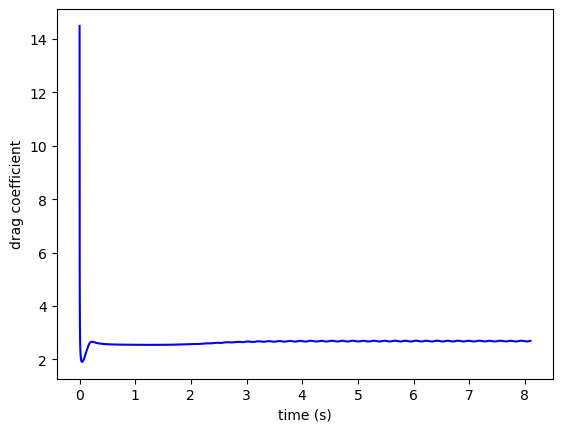

In [9]:
plt.plot(time, drag,'b')
plt.xlabel('time (s)')
plt.ylabel('drag coefficient')

### plot of lift coefficient for 'result20_1' data 

Text(0, 0.5, 'lift coefficient')

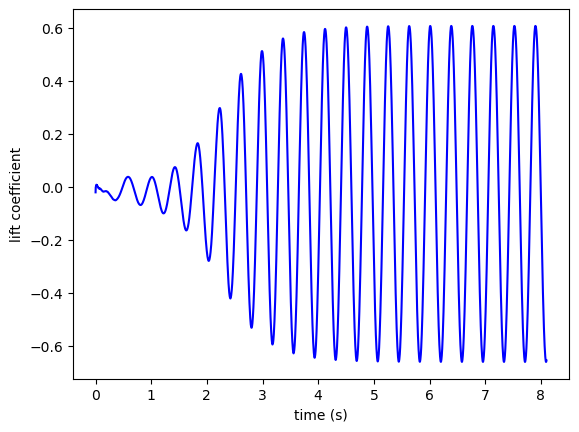

In [10]:
lift= Coarse_Database[19,:,4]
plt.plot(time, lift,'b')
plt.xlabel('time (s)')
plt.ylabel('lift coefficient')

### plot of velocity for 'result20_1' data 

Text(0, 0.5, 'velocity')

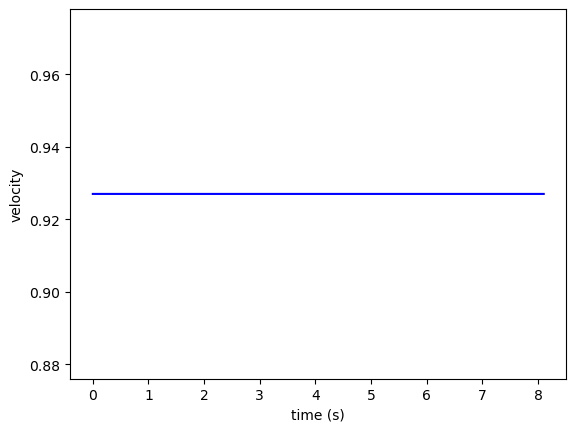

In [11]:
lift= Coarse_Database[19,:,2]
plt.plot(time, lift,'b')
plt.xlabel('time (s)')
plt.ylabel('velocity')